# Code Merkleization Examples

In [1]:
import json
import merkleize
import treeviz

In [2]:
with open("bytecodes/tether_test.json", "r") as json_file:
    rpc_result = json.load(json_file)

In [3]:
bytecode = bytes.fromhex(rpc_result['result'][2:])

In [4]:
bytecode.hex()

'606060405260043610610196576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde031461019b5780630753c30c14610229578063095ea7b3146102625780630e136b19146102'

In [5]:
chunks = merkleize.chunkify(bytecode)


hash:  185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de
code:  606060405260043610610196576000357c010000000000000000000000000000
code_start:  0000000000000000000000000000000000000000000000000000000000000000

hash:  bd6024527ab9d50c49744260439e2e48270dfdb229154023757b66d64a92ee8c
code:  0000000000000000000000000000900463ffffffff16806306fdde031461019b
code_start:  000000000000000000000000000000000000000000000000000000000000002d

hash:  699081d7fd547cbb33af5a7a0839fb3b7bb954d4a6ad127a44e5db8f478a4e81
code:  5780630753c30c14610229578063095ea7b3146102625780630e136b19146102
code_start:  0000000000000000000000000000000000000000000000000000000000000040


In [6]:
total_chunks = len(chunks)
total_chunks

3

In [7]:
merkleize.next_power_of_2(total_chunks)

4

In [8]:
for chunk in chunks:
    print(chunk.hex())

185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de
bd6024527ab9d50c49744260439e2e48270dfdb229154023757b66d64a92ee8c
699081d7fd547cbb33af5a7a0839fb3b7bb954d4a6ad127a44e5db8f478a4e81


In [9]:
tree = merkleize.treefy(chunks,len(bytecode))
total_elements = len(tree)
total_elements

padded_length:  4
len(tree):  8

left:  699081d7fd547cbb33af5a7a0839fb3b7bb954d4a6ad127a44e5db8f478a4e81
right:  0000000000000000000000000000000000000000000000000000000000000000
hash:  af93fc318eb266447346fee7047e3f255e2c7ae74bb4aa448b8192771edb8227

left:  185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de
right:  bd6024527ab9d50c49744260439e2e48270dfdb229154023757b66d64a92ee8c
hash:  d244c50269e2312994ea833476b434f7ca053b355205af05f5a947fafb317d87

left:  d244c50269e2312994ea833476b434f7ca053b355205af05f5a947fafb317d87
right:  af93fc318eb266447346fee7047e3f255e2c7ae74bb4aa448b8192771edb8227
hash:  7f35d2193ee9b61460ec807137e58fb468b7a3b1d037318551cf93c18b191ca2


8

In [10]:
for element in tree:
    print(element.hex())

5ead35d83f7514750741ff288239689bb8454e4d6b5b2c18d31345cec67e03ef
7f35d2193ee9b61460ec807137e58fb468b7a3b1d037318551cf93c18b191ca2
d244c50269e2312994ea833476b434f7ca053b355205af05f5a947fafb317d87
af93fc318eb266447346fee7047e3f255e2c7ae74bb4aa448b8192771edb8227
185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de
bd6024527ab9d50c49744260439e2e48270dfdb229154023757b66d64a92ee8c
699081d7fd547cbb33af5a7a0839fb3b7bb954d4a6ad127a44e5db8f478a4e81
0000000000000000000000000000000000000000000000000000000000000000


In [11]:
tree[0].hex()

'5ead35d83f7514750741ff288239689bb8454e4d6b5b2c18d31345cec67e03ef'

generating tree:
parent ( 0 7f35d2193ee9b61460ec807137e58fb468b7a3b1d037318551cf93c18b191ca2 )
left   ( 1 d244c50269e2312994ea833476b434f7ca053b355205af05f5a947fafb317d87 )
right  ( 2 af93fc318eb266447346fee7047e3f255e2c7ae74bb4aa448b8192771edb8227 )
new parent: left ( 1 d244c50269e2312994ea833476b434f7ca053b355205af05f5a947fafb317d87
left   ( 3 185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de )
right  ( 4 bd6024527ab9d50c49744260439e2e48270dfdb229154023757b66d64a92ee8c )
new parent: right ( 2 af93fc318eb266447346fee7047e3f255e2c7ae74bb4aa448b8192771edb8227
left   ( 5 699081d7fd547cbb33af5a7a0839fb3b7bb954d4a6ad127a44e5db8f478a4e81 )
right  ( 6 0000000000000000000000000000000000000000000000000000000000000000 )
new parent: right ( 3 185902a3936477865aa648d43a8ec1767848d9fc5dc033747c57072a0f0c42de


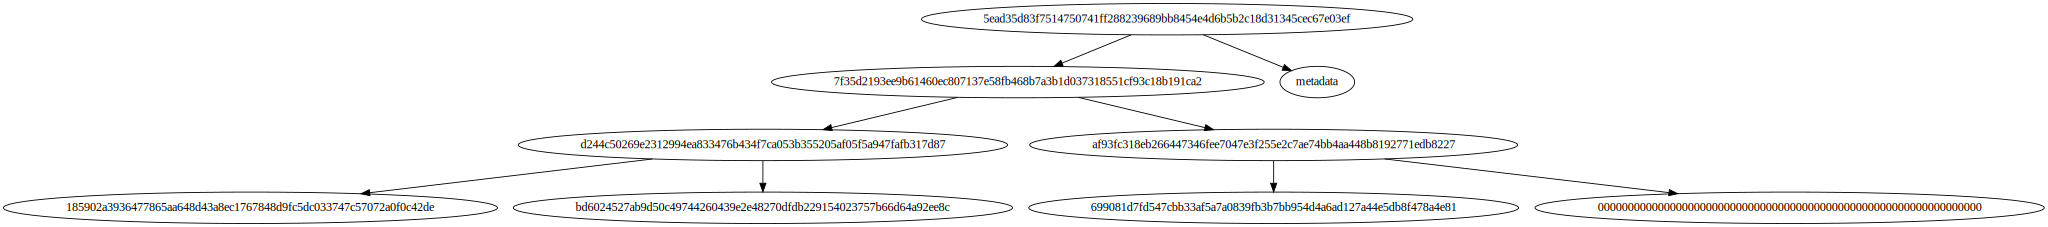

In [12]:
treeviz.show_tree(tree)